In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

from sklearn.cluster import DBSCAN

In [2]:
df =pd.read_csv(r"C:\Users\kavir\OneDrive\Documents\GitHub\Enhancing-Public-Health-by-Identifying-Unhealthy-Foods-Promoting-Healthier-Alternatives\datasets\cleaned_final_dataset.csv")

df.head()

,kroger_product,description,calories,protein,fat,carbohydrates
0,horizon organic shelf-stable 1% low fat milk b...,"strawberry milk, low fat (1%)",69.0,3.13,0.89,12.30
1,kroger® 2% reduced fat milk quart,"milk, reduced fat (2%)",50.0,3.36,1.90,4.90
2,kroger® fat free skim milk half gallon,"milk, fat free (skim)",34.0,3.43,0.08,4.92
3,kroger® vitamin d whole milk half gallon,"milk, dry, whole, with added vitamin d",1014.0,26.30,26.70,38.40
4,simple truth organic® 100% grassfed whole milk...,"simple truth organic, 100% whole wheat bread",233.0,9.30,3.49,46.50


The eblwo states the data prep code where we remove the label and make sure that we quantitative data only. then we normaliza the data using standard scaler.

In [3]:
non_numeric_cols =df.select_dtypes(include=['object']).columns
print(f"Non-numeric columns: {list(non_numeric_cols)}")

df =df.drop(columns=non_numeric_cols)

if 'label' in df.columns:
    labels = df['label']
    df = df.drop(columns=['label'])
else:
    labels = None

scaler= StandardScaler()
X_scaled =scaler.fit_transform(df)

pca =PCA(n_components=3)
X_pca= pca.fit_transform(X_scaled)

var_ret= pca.explained_variance_ratio_.sum()
print(f"Variance retained after PCA: {var_ret:.2%}")

Non-numeric columns: ['kroger_product', 'description']
Variance retained after PCA: 89.38%


In [4]:
df_prep_for_clus =pd.DataFrame(df,columns=df.columns)

df_prep_for_clus.to_csv("df_prep_for_clus.csv",index=False)

Kmeans

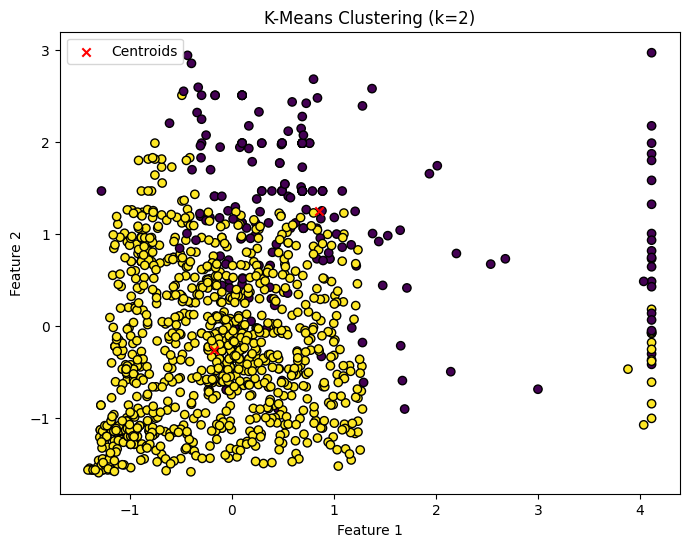

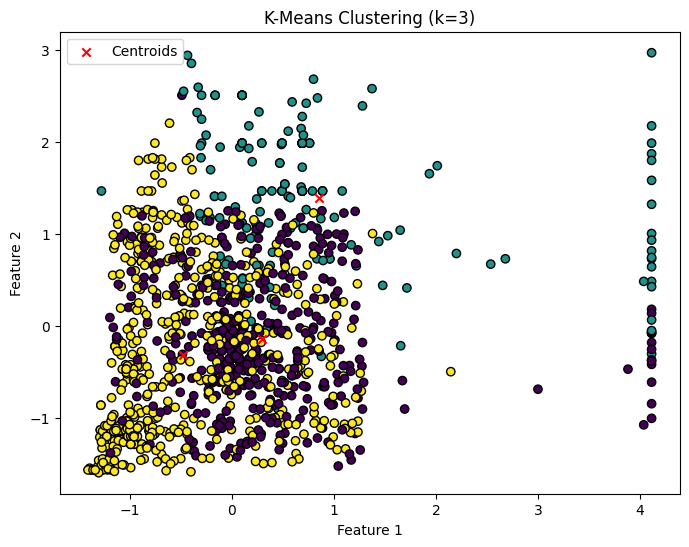

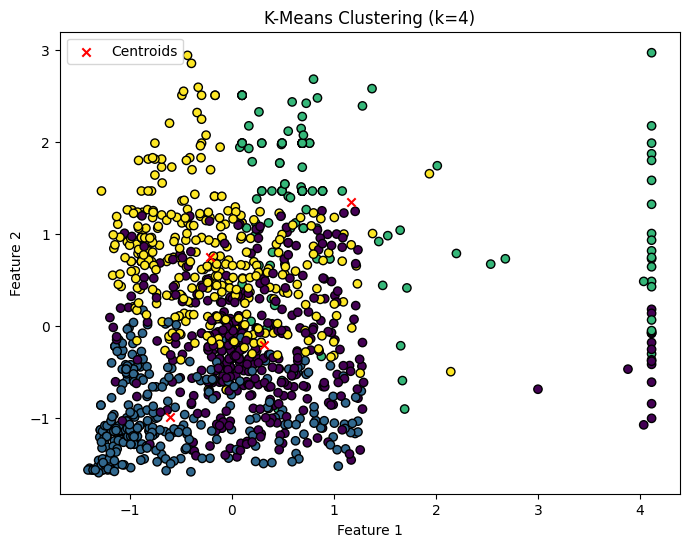

In [5]:
k_values_to_plot= [2, 3,4] 

for k in k_values_to_plot:
    kmeans =KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels= kmeans.fit_predict(X_scaled)

    plt.figure(figsize=(8, 6))
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels, cmap='viridis', edgecolors='k')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='red', marker='x', label="Centroids")
    plt.title(f"K-Means Clustering (k={k})")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()


From the above observation, we see that k=2 has the highest silhouette score and 3 has the lowest

C:\Users\kavir\AppData\Local\Temp\ipykernel_56152\2178230958.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='coolwarm', edgecolors='k')


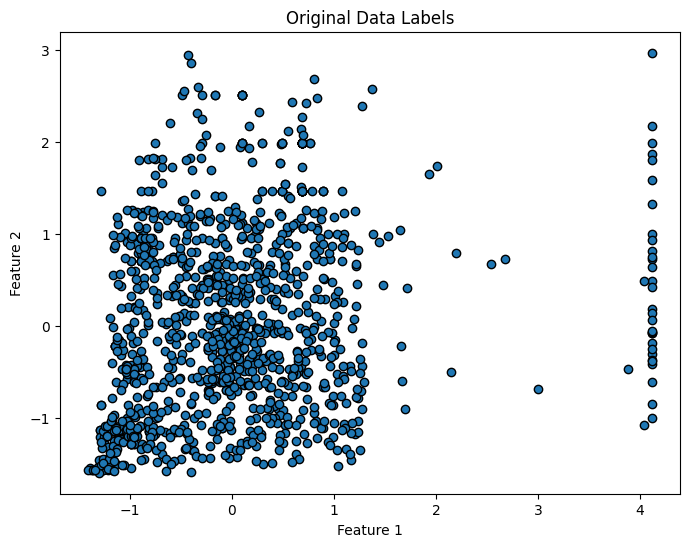

In [6]:
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='coolwarm', edgecolors='k') 
plt.title("Original Data Labels")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

C:\Users\kavir\AppData\Local\Temp\ipykernel_56152\2263039622.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', edgecolors='k')


NameError: name 'best_k' is not defined

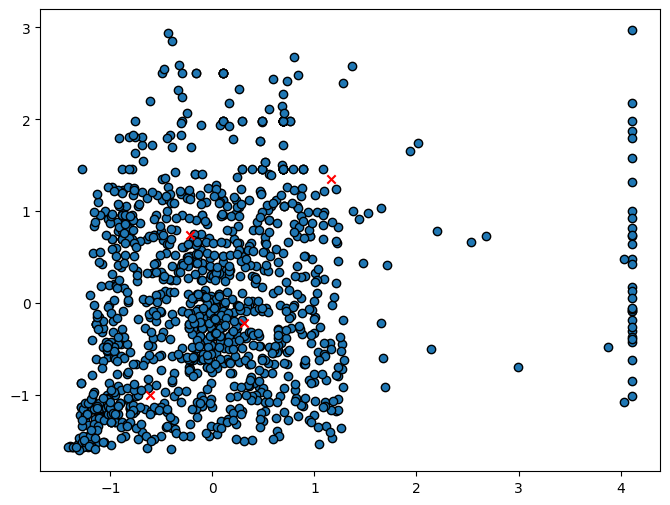

In [7]:
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='red', marker='x', label="Centroids")
plt.title(f"K-Means Clustering (k={best_k})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

C:\Users\kavir\AppData\Local\Temp\ipykernel_5904\2160269426.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='coolwarm', edgecolors='k', alpha=0.6)


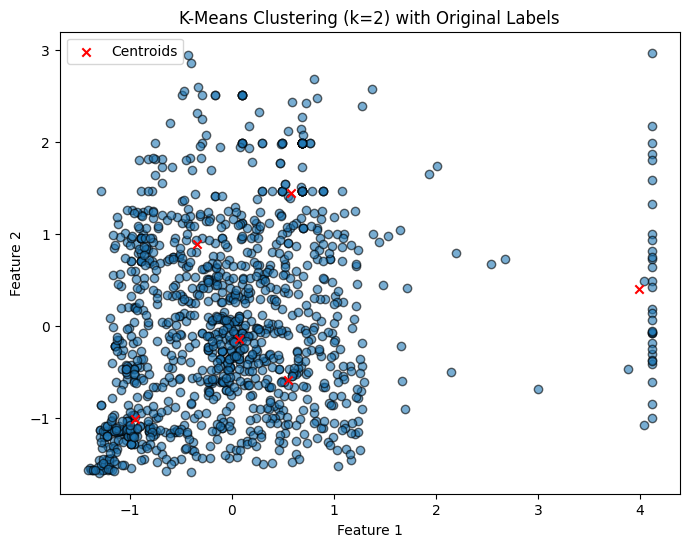

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='coolwarm', edgecolors='k', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            color='red', marker='x', label="Centroids")

plt.title(f"K-Means Clustering (k={best_k}) with Original Labels")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

Hierarchical clustering

The plot for dendogram

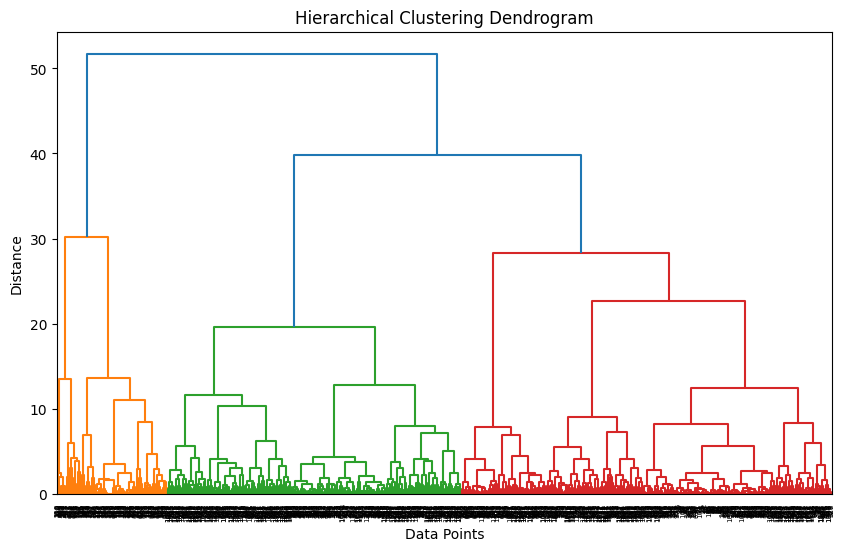

In [ ]:
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

In [ ]:
agg_clust = AgglomerativeClustering(n_clusters=best_k, linkage='ward')
df['cluster_hierarchical'] = agg_clust.fit_predict(X_scaled)

Vizualization for hierarchical clusters

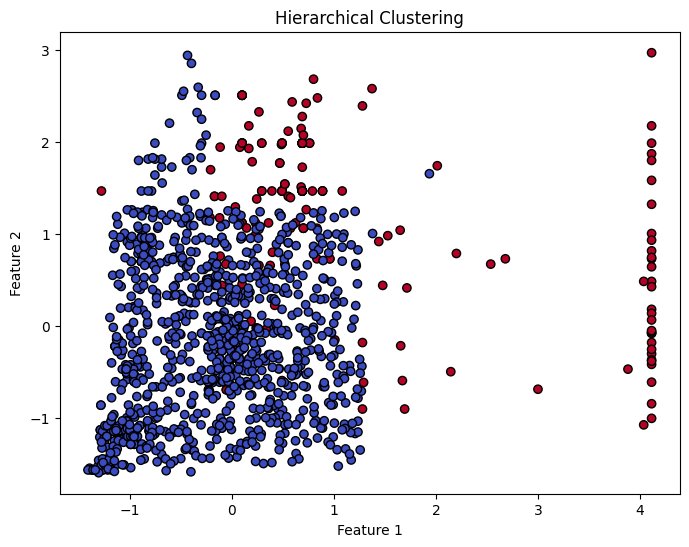

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df['cluster_hierarchical'], cmap='coolwarm', edgecolors='k')
plt.title("Hierarchical Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [ ]:
n_clusters_hier = 3  

agg_clust = AgglomerativeClustering(n_clusters=n_clusters_hier, linkage="ward")
df['cluster_hierarchical'] = agg_clust.fit_predict(X_scaled)

print(f"Assigned {n_clusters_hier} clusters using hierarchical clustering.")

Assigned 3 clusters using hierarchical clustering.


DBSCAN clustering

In [ ]:
dbscan = DBSCAN(eps=0.4, min_samples=8) 
df['cluster_dbscan'] = dbscan.fit_predict(X_scaled)

Visualizing DBCAN

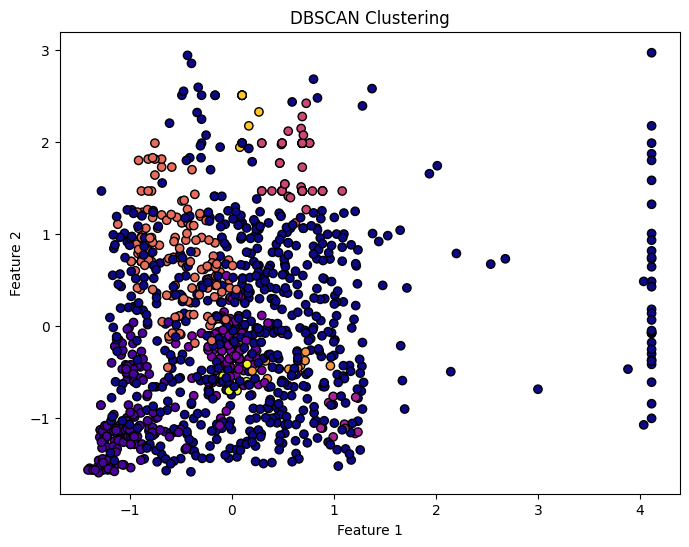

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df['cluster_dbscan'], cmap='plasma', edgecolors='k')
plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [ ]:
noise_pts=(df["cluster_dbscan"] == -1).sum()
noise_pts

np.int64(634)

In [ ]:
silhouette_scores= [] 

for k in k_values:
    kmeans= KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)  
    score =silhouette_score(X_scaled, cluster_labels)  
    silhouette_scores.append(score) 

    print(f"Silhouette Score for k={k}: {score:.3f}") 


Silhouette Score for k=2: 0.379
Silhouette Score for k=3: 0.315
Silhouette Score for k=4: 0.328
Silhouette Score for k=5: 0.350
Silhouette Score for k=6: 0.347


In [ ]:
print(f"Silhouette Scores After Computation: {silhouette_scores}")
k_values =[2, 3, 4, 5, 6] 
print(f"Silhouette Scores List: {silhouette_scores}")

Silhouette Scores After Computation: [np.float64(0.37925185960726837), np.float64(0.31489759955274377), np.float64(0.327625989451679), np.float64(0.3504448617042762), np.float64(0.34662547019242956)]
Silhouette Scores List: [np.float64(0.37925185960726837), np.float64(0.31489759955274377), np.float64(0.327625989451679), np.float64(0.3504448617042762), np.float64(0.34662547019242956)]


CONCLUSION:

**K-Means clustering** 
It provides clear centroids.

**Hierarchical clustering** 
Used to visualize relationships through a dendrogram, though it lacked scalability.

**DBSCAN outperformed K-Means**
effectively handling noise and non-linear clusters, achieving a higher **silhouette score (0.551 vs. 0.379)**.

**DBSCAN**
This is the most robust detecting 634 noise points and adapting to varied cluster densities.